In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
amazon_df = pd.read_csv(r'C:\Users\sourabh\Desktop\loyalist\step presentation\Group project\Data sets\Amazon.csv')
netflix_df = pd.read_csv(r'C:\Users\sourabh\Desktop\loyalist\step presentation\Group project\Data sets\Netflix.csv')
fb_df = pd.read_csv(r'C:\Users\sourabh\Desktop\loyalist\step presentation\Group project\Data sets\Facebook.csv')
apple_df = pd.read_csv(r'C:\Users\sourabh\Desktop\loyalist\step presentation\Group project\Data sets\Apple.csv')
google_df = pd.read_csv(r'C:\Users\sourabh\Desktop\loyalist\step presentation\Group project\Data sets\Google.csv')

In [4]:
amazon_df.head(2)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.43750,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.96875,1.979167,1.708333,1.729167,1.729167,14700000


In [4]:
# Restricting the number of decimal places for read-ability 
amazon_df = amazon_df.round(3)
amazon_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.438,2.500,1.927,1.958,1.958,72156000
1,1997-05-16,1.969,1.979,1.708,1.729,1.729,14700000


In [26]:
#Checking the shape of the dataset
amazon_df.shape

(5851, 9)

In [6]:
#We have 5k rows and 7 columns, now lets check for null values
amazon_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
#No null values, let check the data types of each column
amazon_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
#Making use of panda's datetime feature for better applications
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])
amazon_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.438,2.500,1.927,1.958,1.958,72156000
1,1997-05-16,1.969,1.979,1.708,1.729,1.729,14700000


In [9]:
#Calculation the total time duration of amazon stocks
amazon_df['Date'].max() - amazon_df['Date'].min()

Timedelta('8492 days 00:00:00')

In [10]:
#There are approximately 253 trading days per year with an average of 21 days monthly, 63 quaterly days.
# out of 365 days 104 days are weekends
# lets compare how amazon stocks performed for the last couple of months(90 days)
amazon_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,2675,2715,2637,2679,2679,4859654
std,341,344,327,333,333,1791083
min,2021,2044,2011,2042,2042,2487800
25%,2401,2425,2365,2402,2402,3527725
50%,2602,2623,2530,2586,2586,4446600
75%,3028,3082,2985,3027,3027,5775425
max,3251,3344,3165,3225,3225,12038200


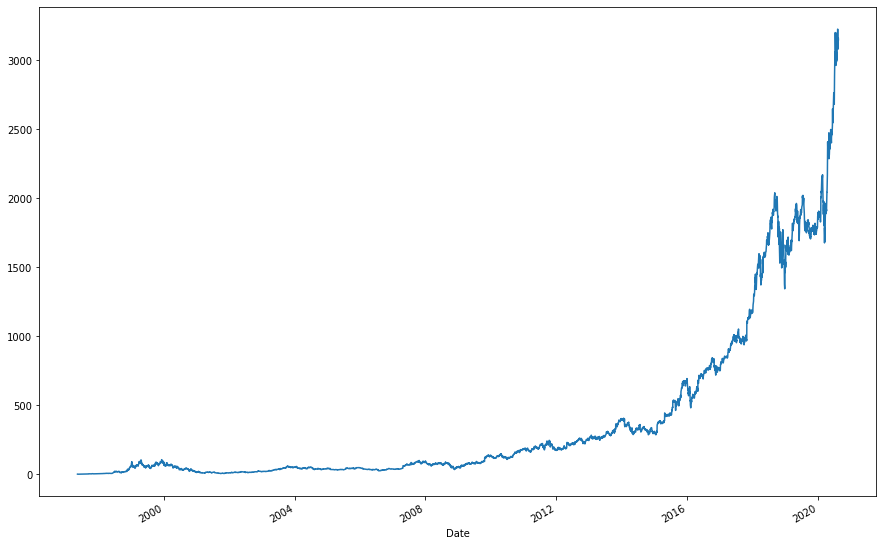

In [11]:
#lets use date columnn as the index to plot the graphs as it gives us a timeline
amazon_df.index = amazon_df['Date']
#plotting the closing price to get an idea over the period of 2 years              #Final
amazon_df['Adj Close'].plot(figsize=(15,10))
plt.show()

In [12]:
#Daily percentage change in returns
amazon_df['daily_percent_change'] = amazon_df['Adj Close'].pct_change()*100 #Final
amazon_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change
Date,,,,,,,,
1997-05-15,1997-05-15,2.438,2.500,1.927,1.958,1.958,72156000,NaN
1997-05-16,1997-05-16,1.969,1.979,1.708,1.729,1.729,14700000,-11.695608
1997-05-19,1997-05-19,1.760,1.771,1.625,1.708,1.708,6106800,-1.214575
1997-05-20,1997-05-20,1.729,1.750,1.635,1.635,1.635,5467200,-4.274005
1997-05-21,1997-05-21,1.635,1.646,1.375,1.427,1.427,18853200,-12.721713
1997-05-22,1997-05-22,1.438,1.448,1.312,1.396,1.396,11776800,-2.172390
1997-05-23,1997-05-23,1.406,1.521,1.333,1.500,1.500,15937200,7.449857
1997-05-27,1997-05-27,1.510,1.646,1.458,1.583,1.583,8697600,5.533333
1997-05-28,1997-05-28,1.625,1.635,1.531,1.531,1.531,4574400,-3.284902


<AxesSubplot:xlabel='Date'>

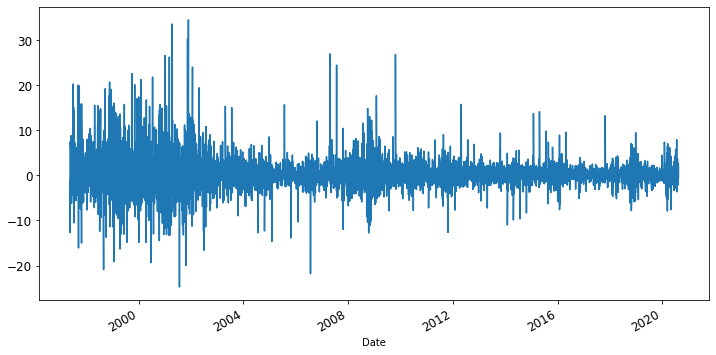

In [13]:
#dropping the first row since it has a nan value
amazon_df.dropna(axis = 0 , inplace = True)                                #Final
amazon_df['daily_percent_change'].plot(figsize = (12,6) , fontsize =12)

In [14]:
#daily returns of amazon stocks, the return seems to be -10% to 10% for the most of the time, with spikes reaching 30% at times.

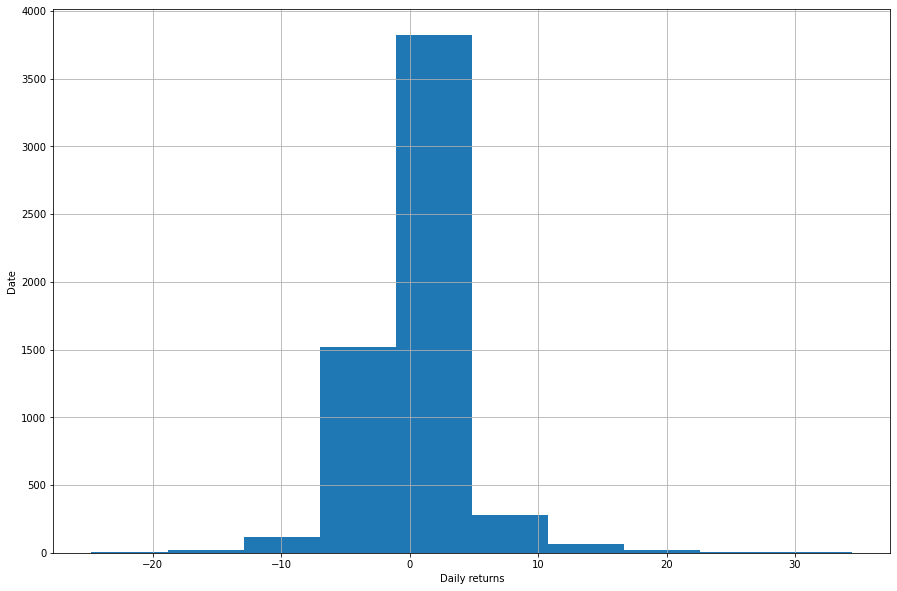

In [15]:
#Daily returns histogram
amazon_df['daily_percent_change'].hist(bins=10, figsize = (15,10))
plt.xlabel('Daily returns')
plt.ylabel('Date')
plt.show()

In [16]:
#statistics of daily percent change returns
amazon_df.daily_percent_change.describe()

count    5851.000000
mean        0.194013
std         3.718459
min       -24.766064
25%        -1.326419
50%         0.046624
75%         1.514100
max        34.471366
Name: daily_percent_change, dtype: float64

In [17]:
#To determine the trend of the stock
def trend(x):
    if x > -0.5 and x <= 0.5:                           #FINAL
        return 'Slight or no change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
amazon_df['Trend']= np.zeros(amazon_df['daily_percent_change'].count())
amazon_df['Trend']= amazon_df['daily_percent_change'].apply(lambda x:trend(x))
amazon_df.head(20) #5 rows enough

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change,Trend
Date,,,,,,,,,
1997-05-16,1997-05-16,1.969,1.979,1.708,1.729,1.729,14700000,-11.695608,Bear drop
1997-05-19,1997-05-19,1.760,1.771,1.625,1.708,1.708,6106800,-1.214575,Negative
1997-05-20,1997-05-20,1.729,1.750,1.635,1.635,1.635,5467200,-4.274005,Among top losers
1997-05-21,1997-05-21,1.635,1.646,1.375,1.427,1.427,18853200,-12.721713,Bear drop
1997-05-22,1997-05-22,1.438,1.448,1.312,1.396,1.396,11776800,-2.172390,Negative
1997-05-23,1997-05-23,1.406,1.521,1.333,1.500,1.500,15937200,7.449857,Bull run
1997-05-27,1997-05-27,1.510,1.646,1.458,1.583,1.583,8697600,5.533333,Among top gainers
1997-05-28,1997-05-28,1.625,1.635,1.531,1.531,1.531,4574400,-3.284902,Among top losers
1997-05-29,1997-05-29,1.542,1.542,1.479,1.505,1.505,3472800,-1.698236,Negative


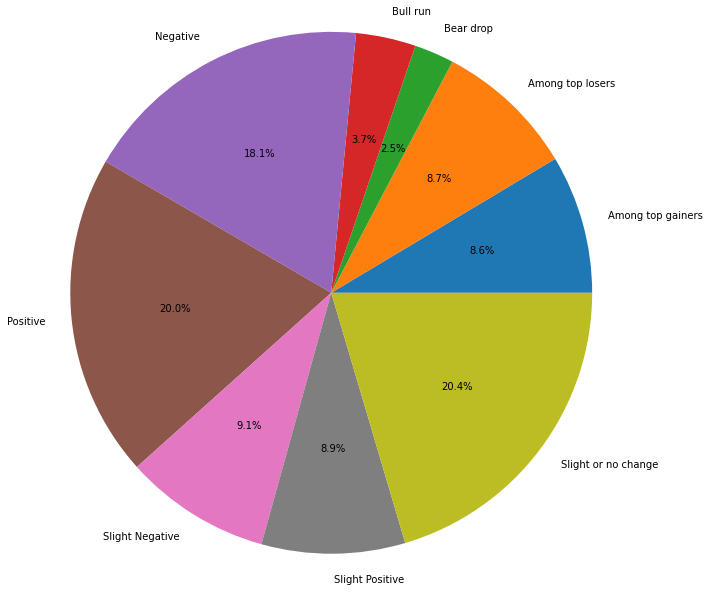

In [18]:
#visualizing amazon stock trend in its entire life time

amazon_pie_data = amazon_df.groupby('Trend')                              
pie_label = sorted([i for i in amazon_df.loc[:, 'Trend'].unique()])
plt.pie(amazon_pie_data['Trend'].count(), labels = pie_label,autopct = '%1.1f%%', radius = 3)
plt.show()

<AxesSubplot:xlabel='Date'>

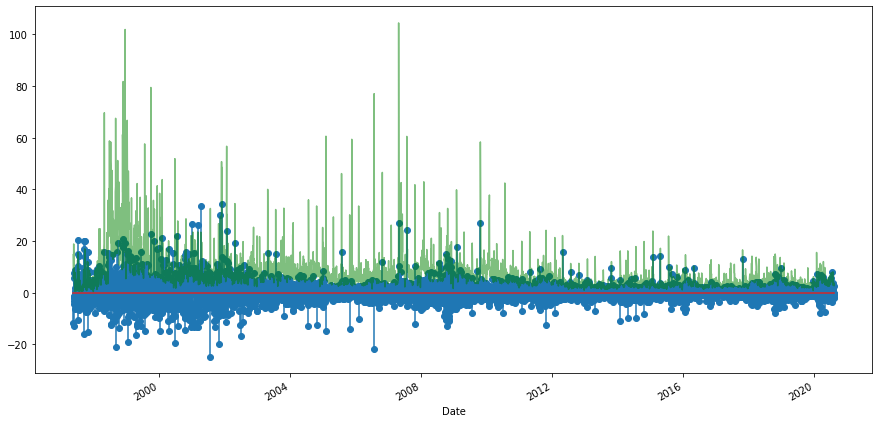

In [19]:
#Daily returns accordingly to the volume, 
#the daily volume has been reduced in scale to match daily return(daily percent of change in return).
#Daily volume is in green, while daily return is in blue
#There's usually a high rise or decrease in price of the stock when the volume of stocks increases.
#This can be useful to determine the confidence of the invenstor in the company
plt.stem(amazon_df['Date'], amazon_df['daily_percent_change'])
(amazon_df['Volume']/1000000).plot(figsize = (15, 7.5),color = 'green',alpha = 0.5)         #FINAL

# FACEBOOK


In [22]:
# Restricting the number of decimal places for read-ability 
fb_df = fb_df.round(3)
fb_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.05,45.00,38.0,38.23,38.23,573576400
1,2012-05-21,36.53,36.66,33.0,34.03,34.03,168192700


In [27]:
#Making use of panda's datetime feature for better applications
fb_df['Date'] = pd.to_datetime(fb_df['Date'])
fb_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.05,45.00,38.0,38.23,38.23,573576400
1,2012-05-21,36.53,36.66,33.0,34.03,34.03,168192700


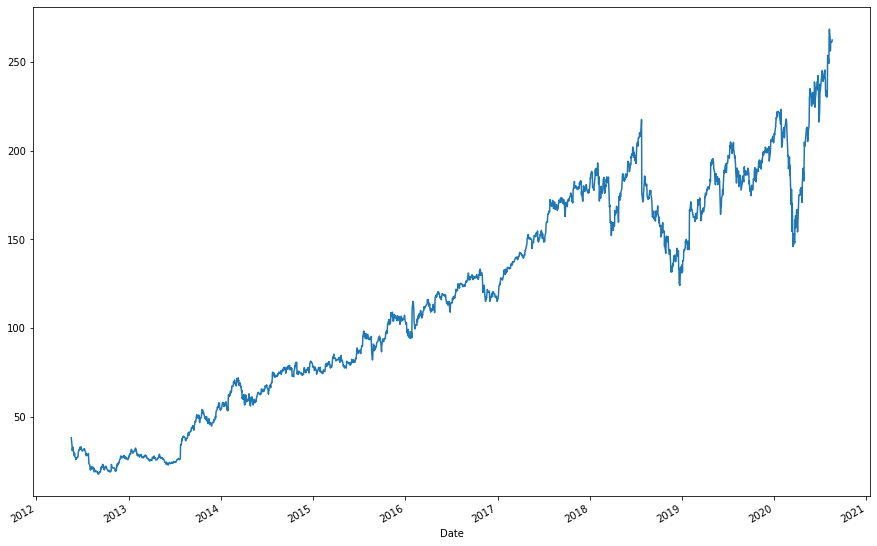

In [28]:
#lets use date columnn as the index to plot the graphs as it gives us a timeline
fb_df.index = fb_df['Date']
#plotting the closing price to get an idea over the period of 2 years              #Final
fb_df['Adj Close'].plot(figsize=(15,10))
plt.show()

In [30]:
#Daily percentage change in returns
fb_df['daily_percent_change'] = fb_df['Adj Close'].pct_change()*100 #Final
fb_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change
Date,,,,,,,,
2012-05-18,2012-05-18,42.05,45.00,38.00,38.23,38.23,573576400,NaN
2012-05-21,2012-05-21,36.53,36.66,33.00,34.03,34.03,168192700,-10.986137
2012-05-22,2012-05-22,32.61,33.59,30.94,31.00,31.00,101786600,-8.903908


<AxesSubplot:xlabel='Date'>

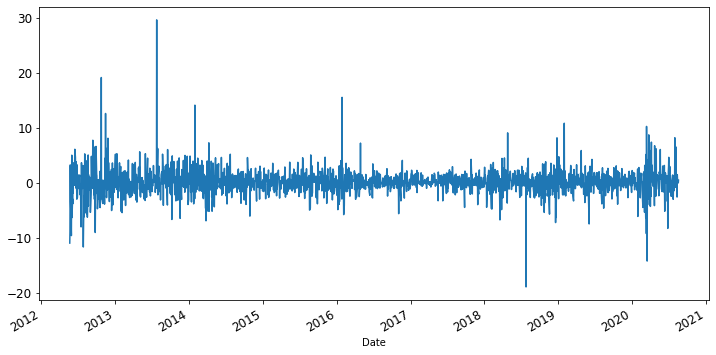

In [31]:
#dropping the first row since it has a nan value
fb_df.dropna(axis = 0 , inplace = True)                                #Final
fb_df['daily_percent_change'].plot(figsize = (12,6) , fontsize =12)

In [33]:
#To determine the trend of the stock
def trend(x):
    if x > -0.5 and x <= 0.5:                           #FINAL
        return 'Slight or no change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
fb_df['Trend']= np.zeros(fb_df['daily_percent_change'].count())
fb_df['Trend']= fb_df['daily_percent_change'].apply(lambda x:trend(x))
fb_df.head(3) #5 rows enough

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change,Trend
Date,,,,,,,,,
2012-05-21,2012-05-21,36.53,36.66,33.00,34.03,34.03,168192700,-10.986137,Bear drop
2012-05-22,2012-05-22,32.61,33.59,30.94,31.00,31.00,101786600,-8.903908,Bear drop
2012-05-23,2012-05-23,31.37,32.50,31.36,32.00,32.00,73600000,3.225806,Among top gainers


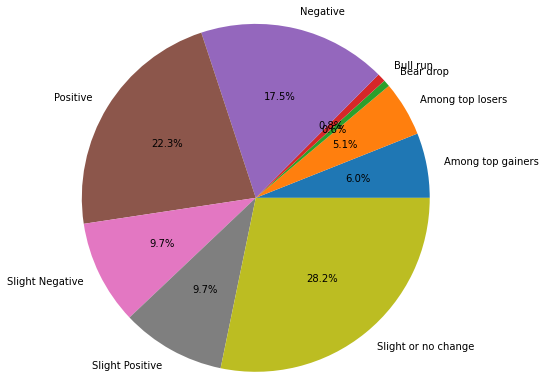

In [37]:
#visualizing facebook stock trend in its entire life time

fb_pie_data = fb_df.groupby('Trend')                              #FINAL
pie_label = sorted([i for i in fb_df.loc[:, 'Trend'].unique()])
plt.pie(fb_pie_data['Trend'].count(), labels = pie_label,autopct = '%1.1f%%', radius = 2)
plt.show()

<AxesSubplot:xlabel='Date'>

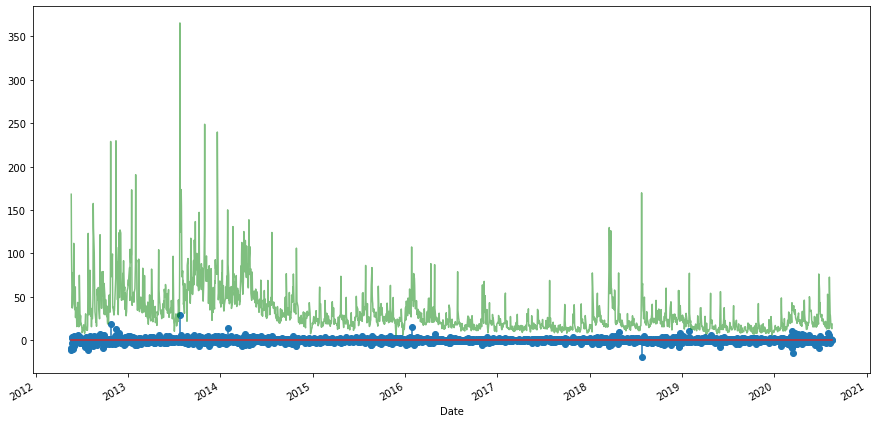

In [38]:
#Daily returns with respect to the volume, 
#the daily volume has been reduced in scale to match daily return(daily percent of change in return).
#Daily volume is in green, while daily return is in blue
#There's usually a high rise or decrease in price of the stock when the volume of stocks increases.
#This can be useful to determine the confidence of the invenstor in the company
plt.stem(fb_df['Date'], fb_df['daily_percent_change'])
(fb_df['Volume']/1000000).plot(figsize = (15, 7.5),color = 'green',alpha = 0.5) 

# APPLE

In [43]:
# Restricting the number of decimal places for read-ability 
apple_df = apple_df.round(3)
apple_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128,0.129,0.128,0.128,0.101,469033600.0
1,1980-12-15,0.122,0.122,0.122,0.122,0.096,175884800.0


In [44]:
#Making use of panda's datetime feature for better applications
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128,0.129,0.128,0.128,0.101,469033600.0
1,1980-12-15,0.122,0.122,0.122,0.122,0.096,175884800.0


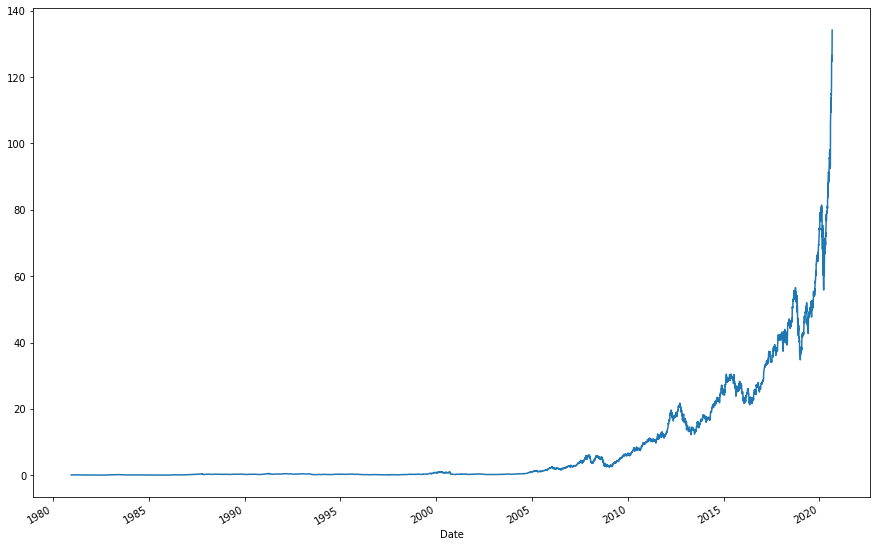

In [53]:
#lets use date columnn as the index to plot the graphs as it gives us a timeline
apple_df.index = apple_df['Date']
#plotting the closing price to get an idea over the period of 2 years              #Final
apple_df['Adj Close'].plot(figsize=(15,10))
plt.show()

In [46]:
#Daily percentage change in returns
apple_df['daily_percent_change'] = apple_df['Adj Close'].pct_change()*100 #Final
apple_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change
0,1980-12-12,0.128,0.129,0.128,0.128,0.101,469033600.0,NaN
1,1980-12-15,0.122,0.122,0.122,0.122,0.096,175884800.0,-4.950495
2,1980-12-16,0.113,0.113,0.113,0.113,0.089,105728000.0,-7.291667


<AxesSubplot:>

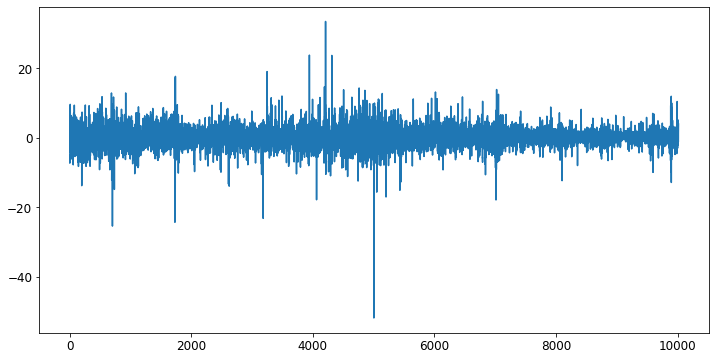

In [47]:
#dropping the first row since it has a nan value
apple_df.dropna(axis = 0 , inplace = True)                                #Final
apple_df['daily_percent_change'].plot(figsize = (12,6) , fontsize =12)

In [48]:
#To determine the trend of the stock
def trend(x):
    if x > -0.5 and x <= 0.5:                           #FINAL
        return 'Slight or no change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
apple_df['Trend']= np.zeros(apple_df['daily_percent_change'].count())
apple_df['Trend']= apple_df['daily_percent_change'].apply(lambda x:trend(x))
apple_df.head(3) #5 rows enough

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change,Trend
1,1980-12-15,0.122,0.122,0.122,0.122,0.096,175884800.0,-4.950495,Among top losers
2,1980-12-16,0.113,0.113,0.113,0.113,0.089,105728000.0,-7.291667,Bear drop
3,1980-12-17,0.116,0.116,0.116,0.116,0.091,86441600.0,2.247191,Positive


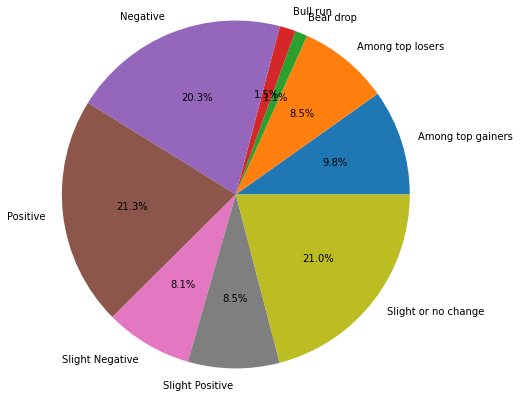

In [65]:
#visualizing apple stock trend in its entire life time

apple_pie_data = apple_df.groupby('Trend')                              #FINAL
pie_label = sorted([i for i in netflix_df.loc[:, 'Trend'].unique()])
plt.pie(apple_pie_data['Trend'].count(), labels = pie_label,autopct = '%1.1f%%', radius = 2)
plt.show()

<AxesSubplot:xlabel='Date'>

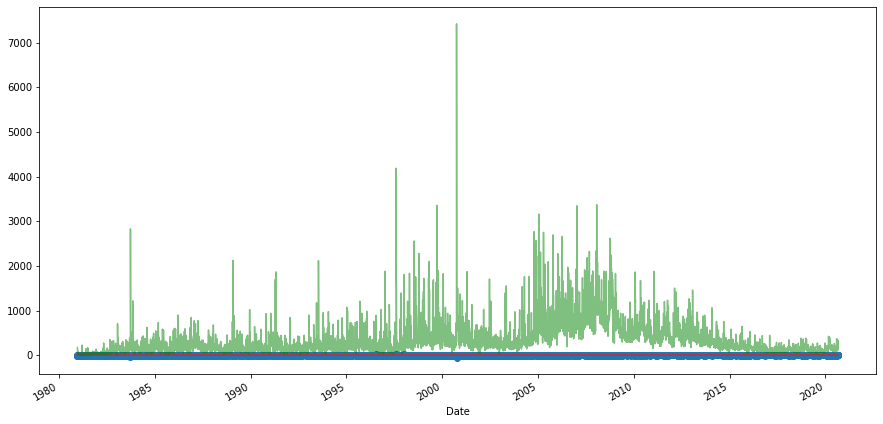

In [54]:
#Daily returns with respect to the volume, 
#the daily volume has been reduced in scale to match daily return(daily percent of change in return).
#Daily volume is in green, while daily return is in blue
#There's usually a high rise or decrease in price of the stock when the volume of stocks increases.
#This can be useful to determine the confidence of the invenstor in the company
plt.stem(apple_df['Date'], apple_df['daily_percent_change'])
(apple_df['Volume']/1000000).plot(figsize = (15, 7.5),color = 'green',alpha = 0.5) 

# NETFLIX


In [57]:
# Restricting the number of decimal places for read-ability 
netflix_df = netflix_df.round(3)
netflix_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156,1.243,1.146,1.196,1.196,104790000
1,2002-05-24,1.214,1.225,1.197,1.210,1.210,11104800


In [58]:
#Making use of panda's datetime feature for better applications
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])
netflix_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156,1.243,1.146,1.196,1.196,104790000
1,2002-05-24,1.214,1.225,1.197,1.210,1.210,11104800


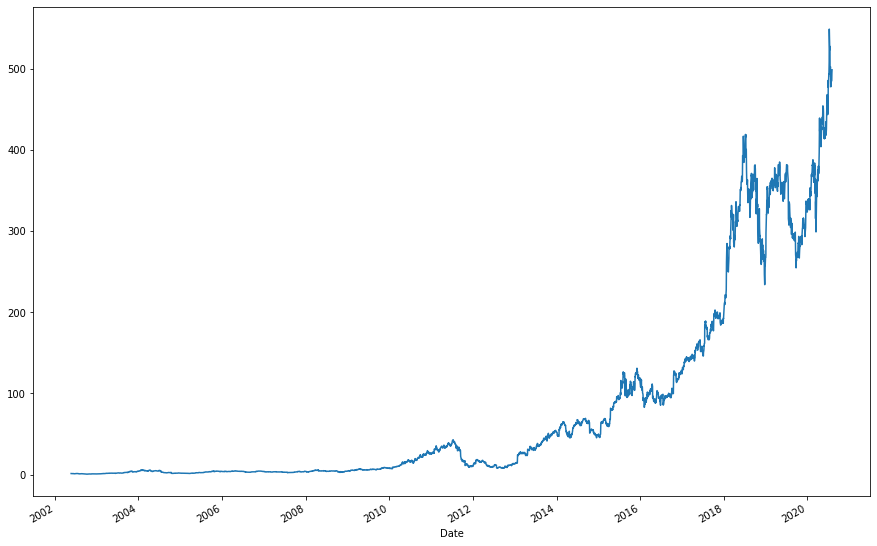

In [59]:
#lets use date columnn as the index to plot the graphs as it gives us a timeline
netflix_df.index = netflix_df['Date']
#plotting the closing price to get an idea over the period of 2 years              #Final
netflix_df['Adj Close'].plot(figsize=(15,10))
plt.show()

In [60]:
#Daily percentage change in returns
netflix_df['daily_percent_change'] = netflix_df['Adj Close'].pct_change()*100 #Final
netflix_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change
Date,,,,,,,,
2002-05-23,2002-05-23,1.156,1.243,1.146,1.196,1.196,104790000,NaN
2002-05-24,2002-05-24,1.214,1.225,1.197,1.210,1.210,11104800,1.170569
2002-05-28,2002-05-28,1.214,1.232,1.157,1.157,1.157,6609400,-4.380165


<AxesSubplot:xlabel='Date'>

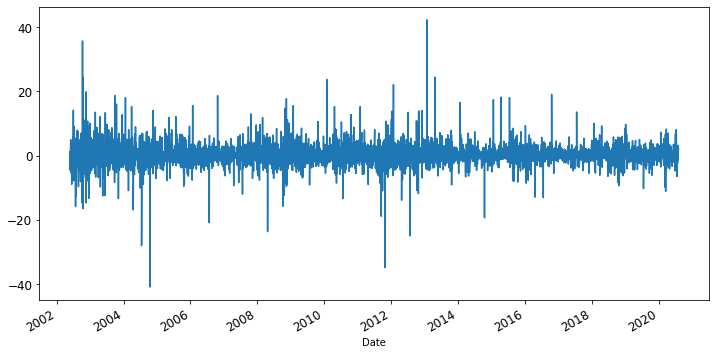

In [61]:
#dropping the first row since it has a nan value
netflix_df.dropna(axis = 0 , inplace = True)                                #Final
netflix_df['daily_percent_change'].plot(figsize = (12,6) , fontsize =12)

In [62]:
#To determine the trend of the stock
def trend(x):
    if x > -0.5 and x <= 0.5:                           #FINAL
        return 'Slight or no change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
netflix_df['Trend']= np.zeros(netflix_df['daily_percent_change'].count())
netflix_df['Trend']= netflix_df['daily_percent_change'].apply(lambda x:trend(x))
netflix_df.head(3) #5 rows enough

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change,Trend
Date,,,,,,,,,
2002-05-24,2002-05-24,1.214,1.225,1.197,1.210,1.210,11104800,1.170569,Positive
2002-05-28,2002-05-28,1.214,1.232,1.157,1.157,1.157,6609400,-4.380165,Among top losers
2002-05-29,2002-05-29,1.164,1.164,1.086,1.104,1.104,6757800,-4.580812,Among top losers


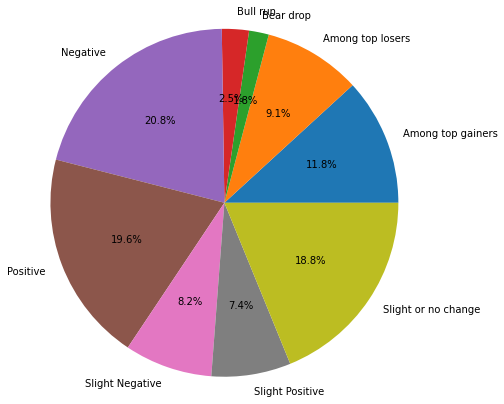

In [63]:
#visualizing netflix stock trend in its entire life time

netflix_pie_data = netflix_df.groupby('Trend')                              #FINAL
pie_label = sorted([i for i in netflix_df.loc[:, 'Trend'].unique()])
plt.pie(netflix_pie_data['Trend'].count(), labels = pie_label,autopct = '%1.1f%%', radius = 2)
plt.show()

<AxesSubplot:xlabel='Date'>

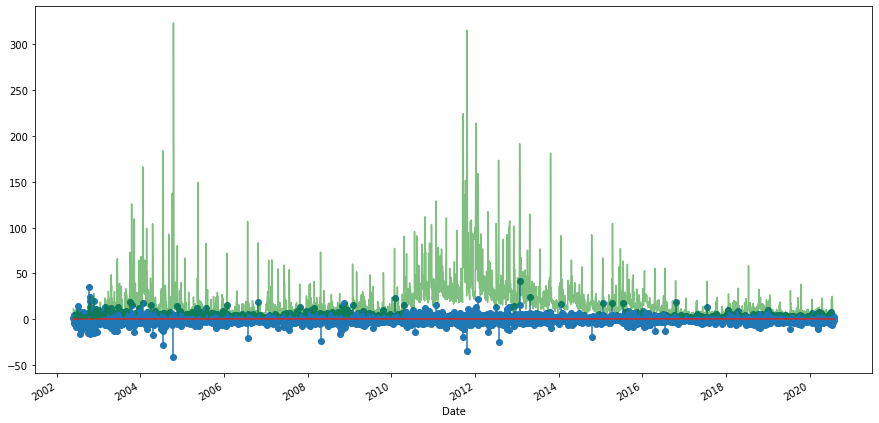

In [81]:
#Daily returns with respect to the volume, 
#the daily volume has been reduced in scale to match daily return(daily percent of change in return).
#Daily volume is in green, while daily return is in blue
#There's usually a high rise or decrease in price of the stock when the volume of stocks increases.
#This can be useful to determine the confidence of the invenstor in the company
plt.stem(netflix_df['Date'], netflix_df['daily_percent_change'])
(netflix_df['Volume']/1000000).plot(figsize = (15, 7.5),color = 'green',alpha = 0.5) 

# GOOGLE

In [70]:
# Restricting the number of decimal places for read-ability 
google_df = google_df.round(3)
google_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050,52.082,48.028,50.220,50.220,44659000
1,2004-08-20,50.556,54.595,50.300,54.209,54.209,22834300


In [71]:
#Making use of panda's datetime feature for better applications
google_df['Date'] = pd.to_datetime(google_df['Date'])
google_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050,52.082,48.028,50.220,50.220,44659000
1,2004-08-20,50.556,54.595,50.300,54.209,54.209,22834300


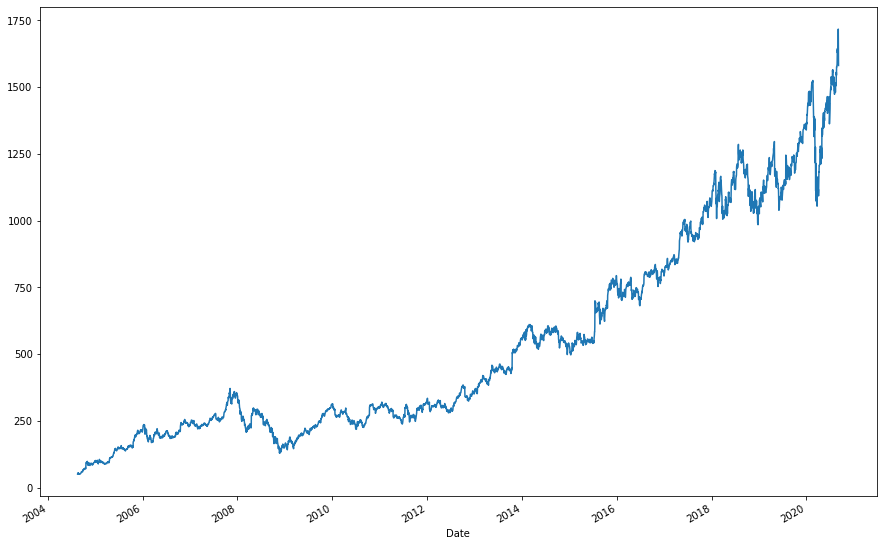

In [72]:
#lets use date columnn as the index to plot the graphs as it gives us a timeline
google_df.index = google_df['Date']
#plotting the closing price to get an idea over the period of 2 years              #Final
google_df['Adj Close'].plot(figsize=(15,10))
plt.show()

In [73]:
#Daily percentage change in returns
google_df['daily_percent_change'] = google_df['Adj Close'].pct_change()*100 #Final
google_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change
Date,,,,,,,,
2004-08-19,2004-08-19,50.050,52.082,48.028,50.220,50.220,44659000,NaN
2004-08-20,2004-08-20,50.556,54.595,50.300,54.209,54.209,22834300,7.943051
2004-08-23,2004-08-23,55.430,56.797,54.580,54.755,54.755,18256100,1.007213


<AxesSubplot:xlabel='Date'>

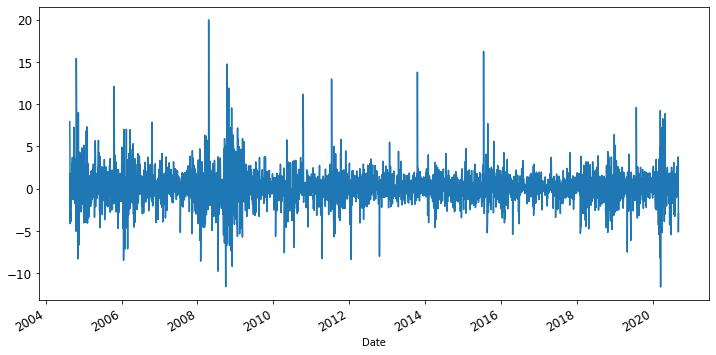

In [74]:
#dropping the first row since it has a nan value
google_df.dropna(axis = 0 , inplace = True)                                #Final
google_df['daily_percent_change'].plot(figsize = (12,6) , fontsize =12)

In [79]:
#To determine the trend of the stock
def trend(x):
    if x > -0.5 and x <= 0.5:                           #FINAL
        return 'Slight or no change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
google_df['Trend']= np.zeros(google_df['daily_percent_change'].count())
google_df['Trend']= google_df['daily_percent_change'].apply(lambda x:trend(x))
google_df.head(3) #5 rows enough

,Date,Open,High,Low,Close,Adj Close,Volume,daily_percent_change,Trend
Date,,,,,,,,,
2004-08-20,2004-08-20,50.556,54.595,50.300,54.209,54.209,22834300,7.943051,Bull run
2004-08-23,2004-08-23,55.430,56.797,54.580,54.755,54.755,18256100,1.007213,Positive
2004-08-24,2004-08-24,55.676,55.856,51.837,52.487,52.487,15247300,-4.142087,Among top losers


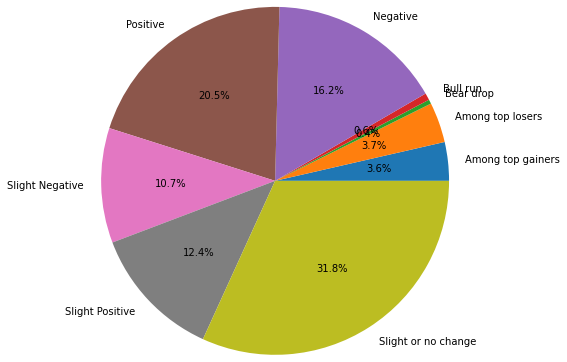

In [80]:
#visualizing google stock trend in its entire life time

google_pie_data = google_df.groupby('Trend')                              #FINAL
pie_label = sorted([i for i in google_df.loc[:, 'Trend'].unique()])
plt.pie(google_pie_data['Trend'].count(), labels = pie_label,autopct = '%1.1f%%', radius = 2)
plt.show()

<AxesSubplot:xlabel='Date'>

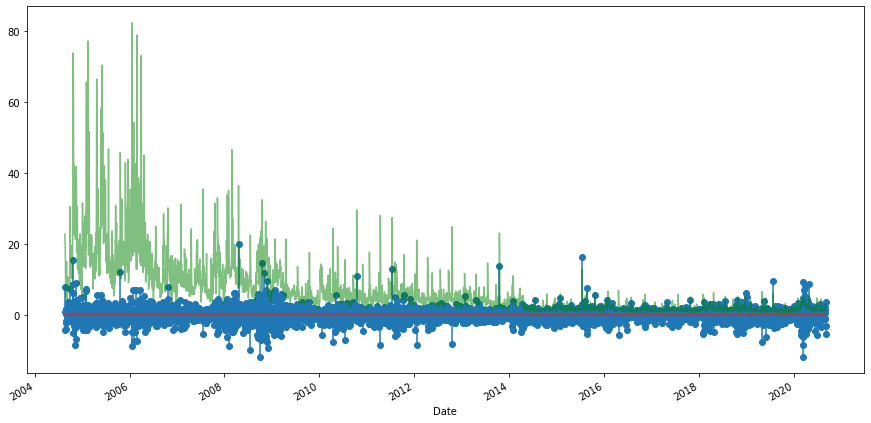

In [82]:
#Daily returns with respect to the volume, 
#the daily volume has been reduced in scale to match daily return(daily percent of change in return).
#Daily volume is in green, while daily return is in blue
#There's usually a high rise or decrease in price of the stock when the volume of stocks increases.
#This can be useful to determine the confidence of the invenstor in the company
plt.stem(google_df['Date'], google_df['daily_percent_change'])
(google_df['Volume']/1000000).plot(figsize = (15, 7.5),color = 'green',alpha = 0.5) 